In [2]:
import pandas as pd, networkx as nx
from pandas.plotting import autocorrelation_plot
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
import trace_analysis
import os
import trace_statistics 

# 1st Trace of Normal Network
## All nodes operating
Parse the 1st trace file with 200 packets over a network without any attacker.

In [3]:
nodes1, hops1 = trace_analysis.process_iotlab_node_by_node(os.getcwd() + '/traces/', '2019-01JAN-30-1')

../trace_analysis.py:248: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


In [4]:
nodes1.keys()

Index(['m3-105', 'm3-113', 'm3-118', 'm3-126', 'm3-129', 'm3-134', 'm3-137',
       'm3-142', 'm3-145', 'm3-150', 'm3-153', 'm3-161', 'm3-166', 'm3-169',
       'm3-174', 'm3-179', 'm3-182', 'm3-185', 'm3-188', 'm3-97'],
      dtype='object')

In [5]:
hops_node = {}

for h in hops1:
    for node_id in hops1[h]:
        hops_node[node_id] = h

Produce Histogram of delay depending on the hop-distance from the root

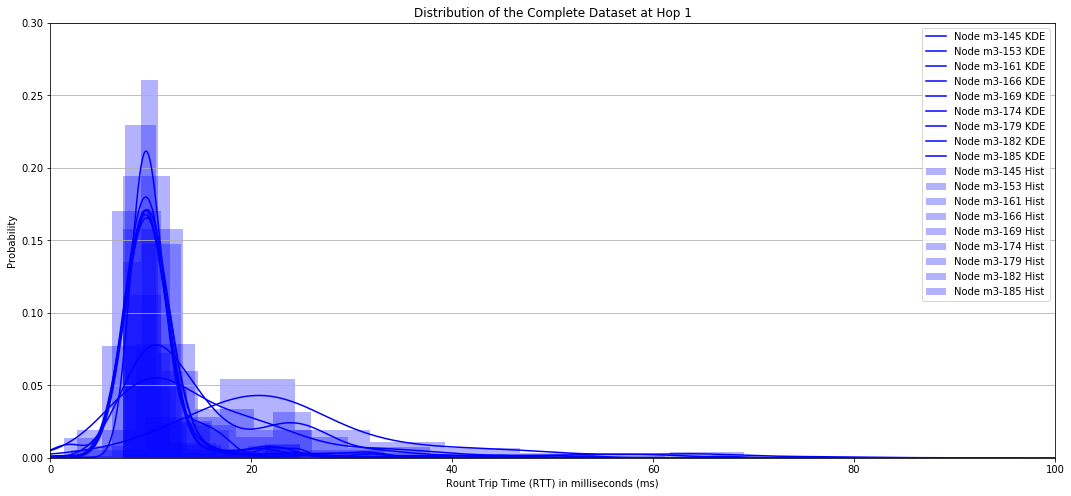

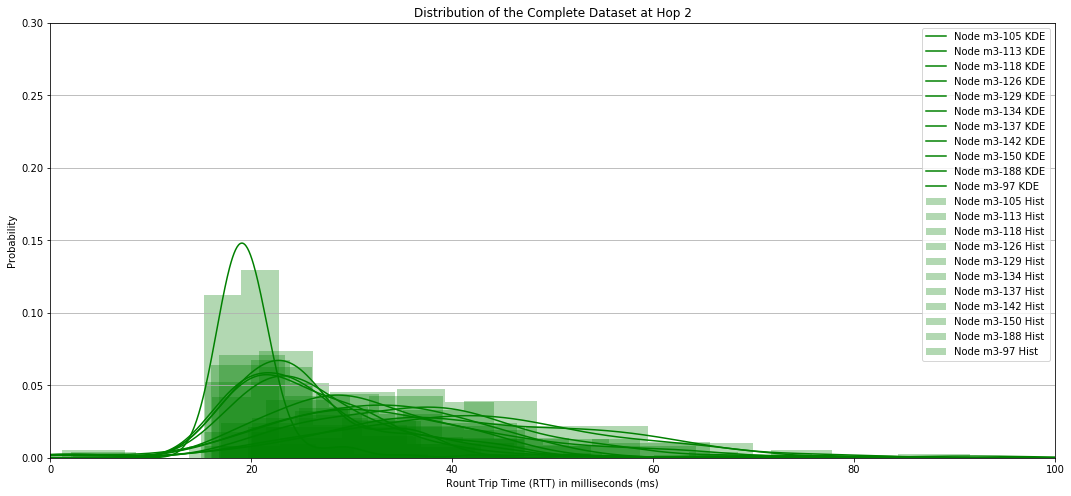

In [7]:
color = ['', 'blue', 'green', 'red']

for h in hops1.keys():
    fig, ax = plt.subplots(figsize=(18, 8))
    
    for node in nodes1:
        if node in hops1[h]:
            nodes1[node].plot.kde(ax=ax, color=color[h], label='Node ' + str(node) + ' KDE')
            nodes1[node].plot.hist(density=True, color=color[h], alpha=0.3, ax=ax, label='Node ' + str(node) + ' Hist')

    ax.set_ylabel('Probability')
    ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
    ax.grid(axis='y')
    ax.set_title('Distribution of the Complete Dataset at Hop ' + str(h))
    ax.set_xlim([0, 100])
    ax.set_ylim([0,0.3])
    ax.legend()
    plt.show()

Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

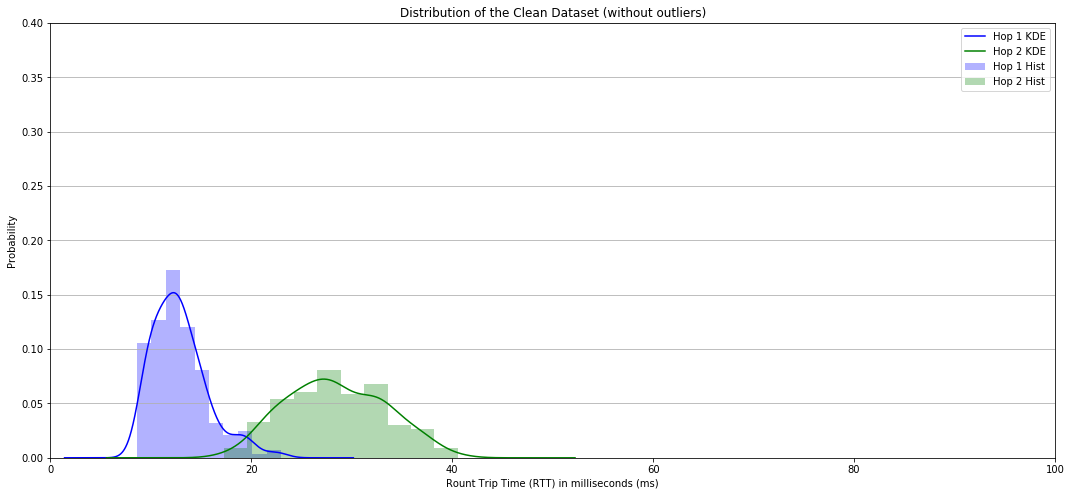

In [5]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values1.keys():
    std_values1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a histogram of the outliers depending on the hop-distance from the root 

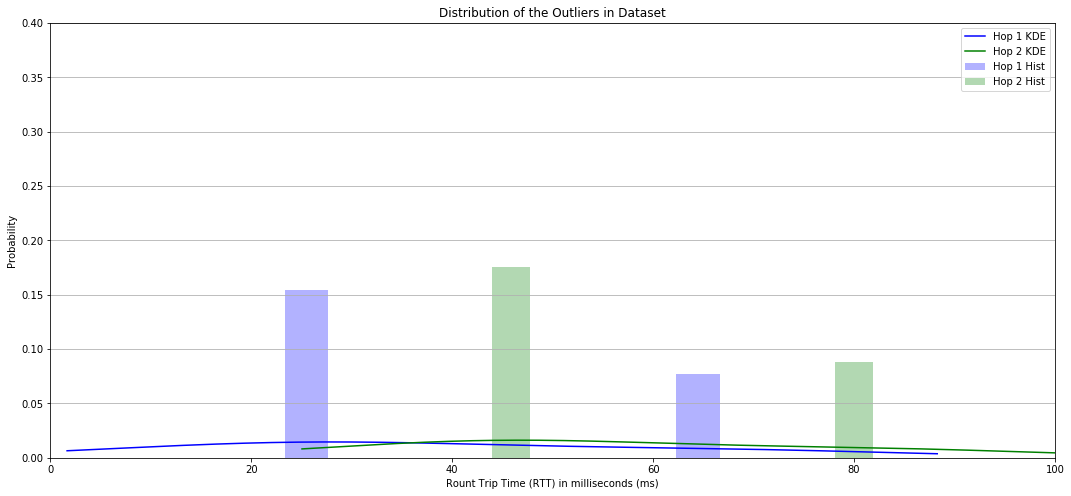

In [6]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers1.keys():
    outliers1[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers1[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Produce a visualization of a tumbling/rolling windows

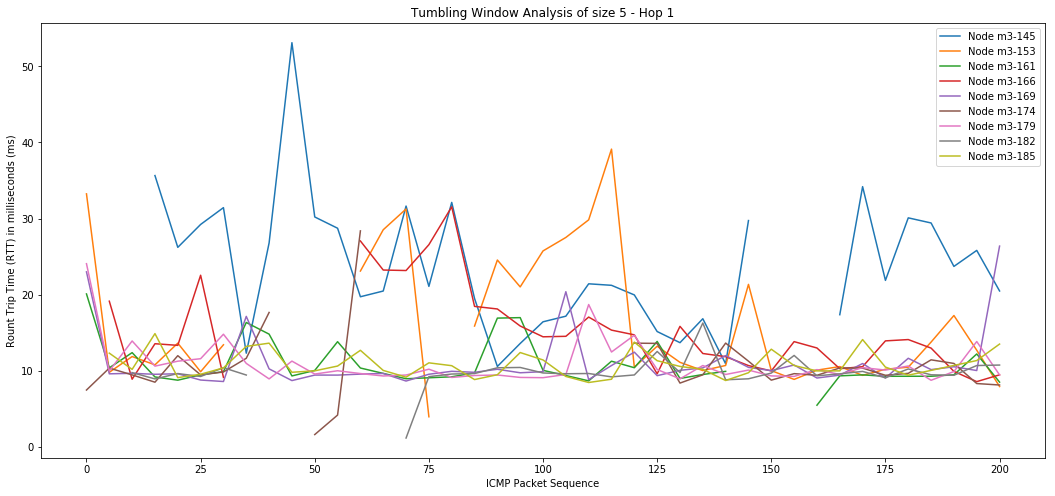

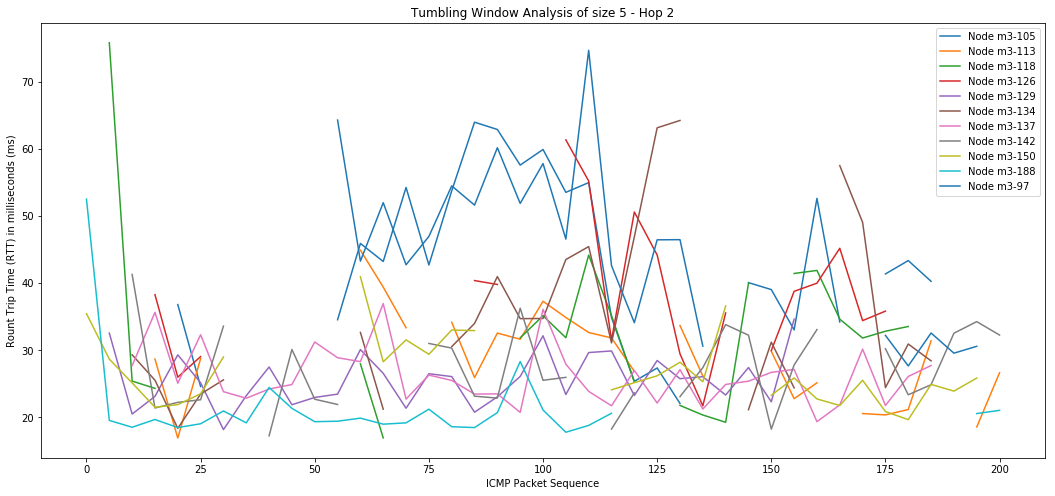

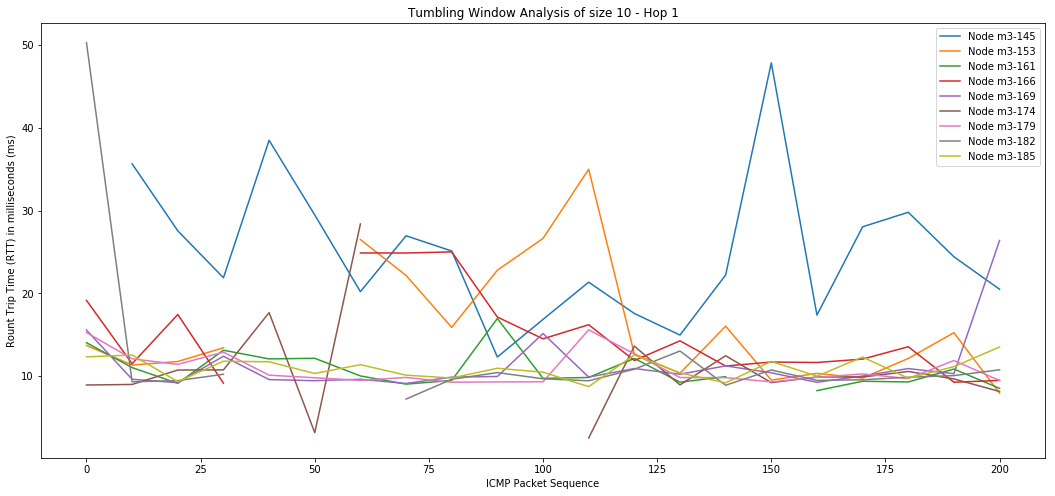

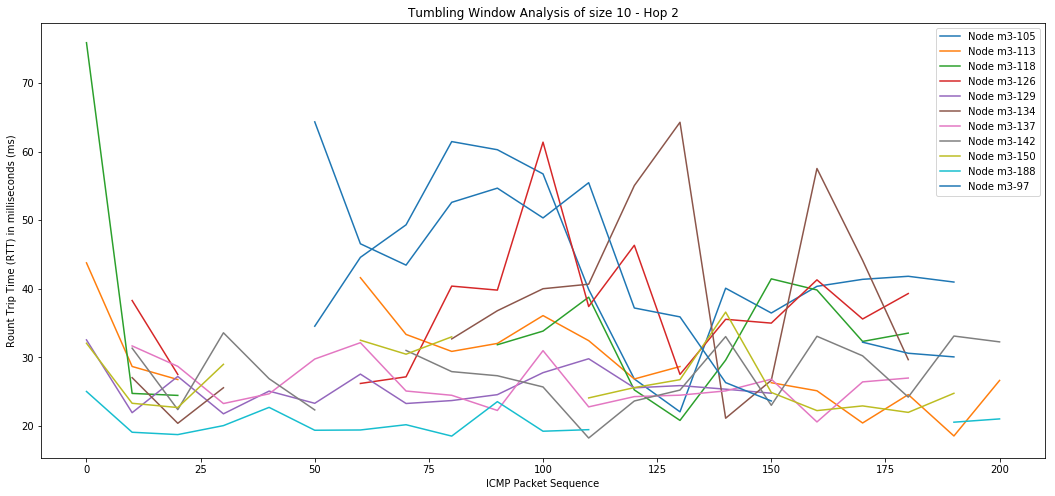

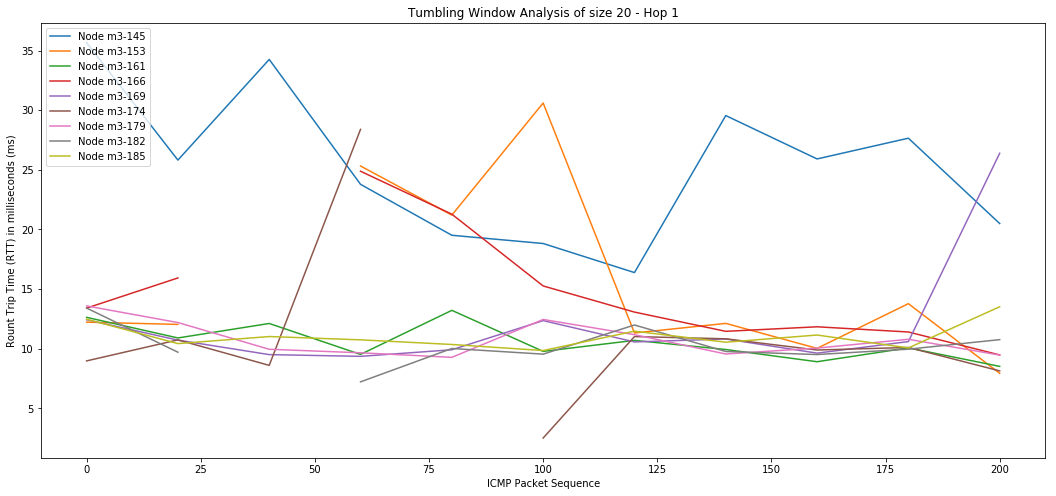

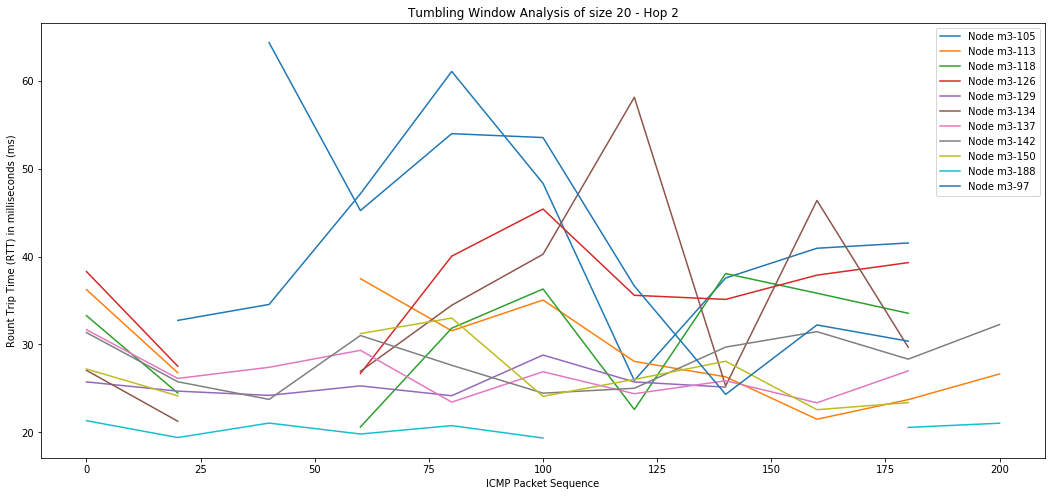

In [24]:
for window_size in [5, 10, 20]:  
    for h in hops1.keys():
        fig, ax = plt.subplots(figsize=(18, 8))
        plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
        plt.xlabel('ICMP Packet Sequence')

        for node in nodes1:
            if node in hops1[h]:
                plt.plot(nodes1[node].groupby(nodes1[node].index // window_size * window_size).mean(), label='Node ' + str(node) + '')

        plt.title('Tumbling Window Analysis of size ' + str(window_size) + ' - Hop ' + str(h))
        plt.legend()
    
    


Packet loss in a tumbling window

ValueError: setting an array element with a sequence.

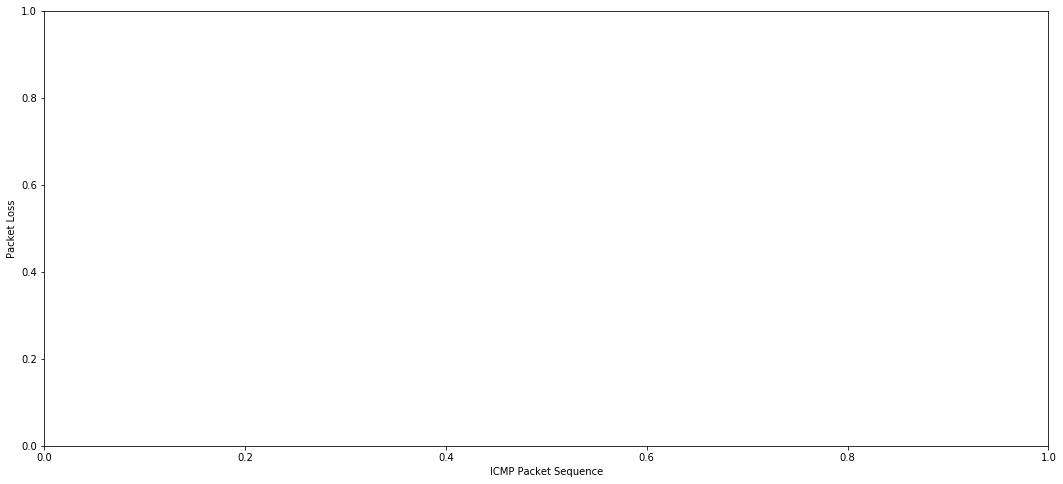

In [45]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.ylabel('Packet Loss')
plt.xlabel('ICMP Packet Sequence')
window_size = 10

for hop in tubling_packet_loss1.keys():
    plt.plot(np.asarray(tubling_packet_loss1[hop],object,float), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Tumbling Window of size ' + str(window_size))
    
plt.title('Packet Loss on a Tumbling Window of size ' + str(window_size))
plt.legend()

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

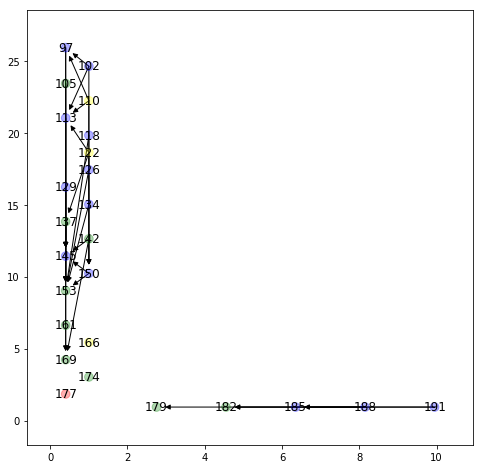

In [108]:
G1 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

## Disconnection of 1 node
Parse the 2nd trace file with 200 packets over a network with 1 node disconnection (node 169).

In [109]:
hop_nodes2 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')
std_values2, outliers2 = trace_analysis.separate_outliers(hop_nodes2)
tubling_packet_loss2 = trace_statistics.tumbling_packet_loss_per_hop(os.getcwd() + '/traces/', '2019-01JAN-30-1b169', window_size=10)

../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


Considering the clean data, produce a histogram of delay depending on the hop-distance from the root 

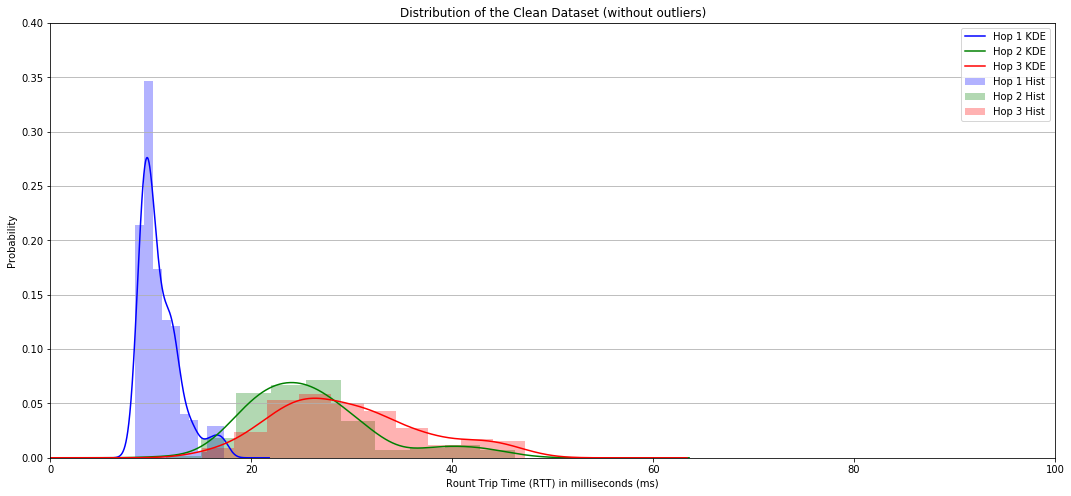

In [110]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values2.keys():
    std_values2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Examine original data

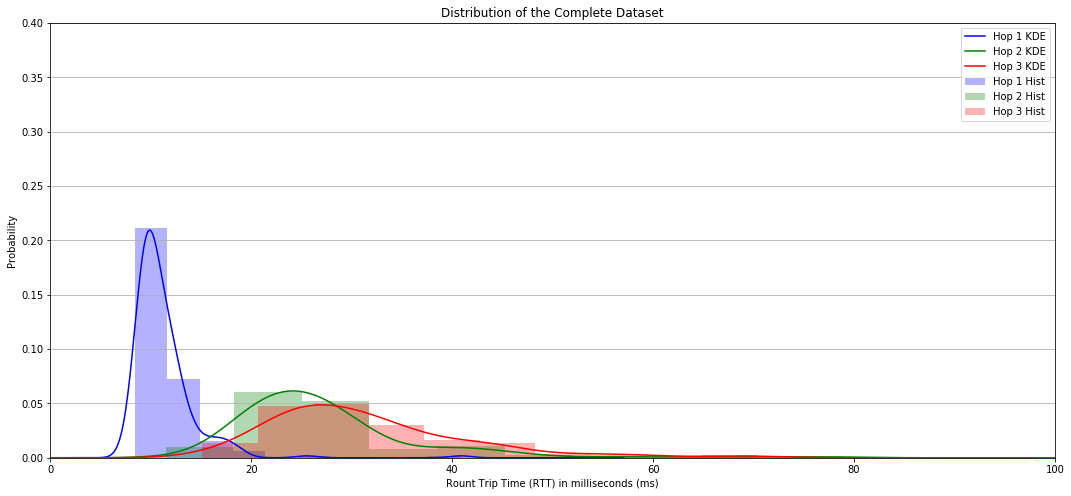

In [111]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    hop_nodes2[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes2[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Complete Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


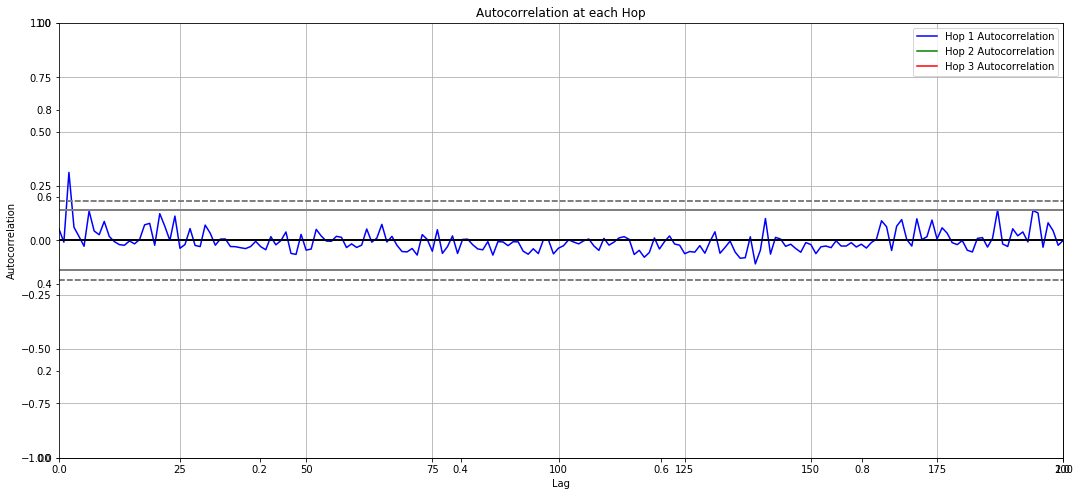

In [112]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes2.keys():
    autocorrelation_plot(hop_nodes2[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

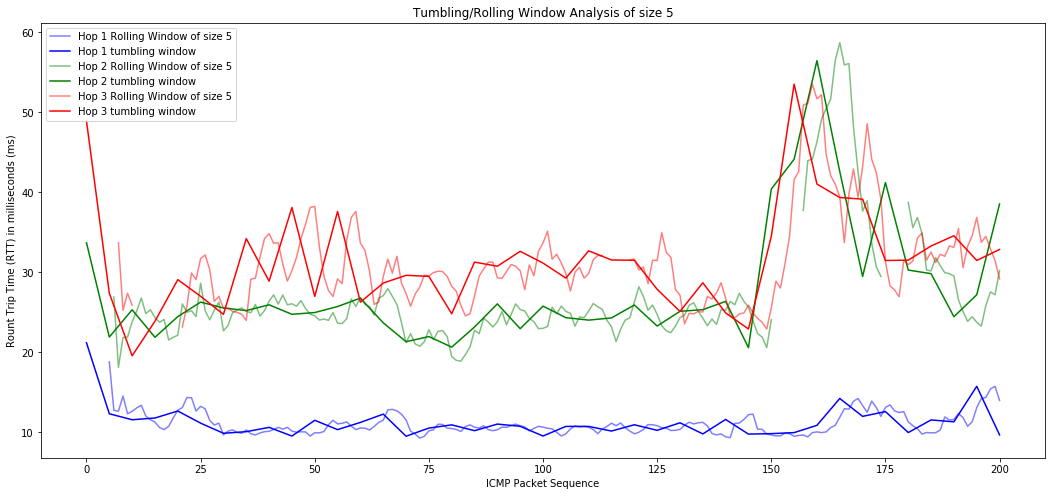

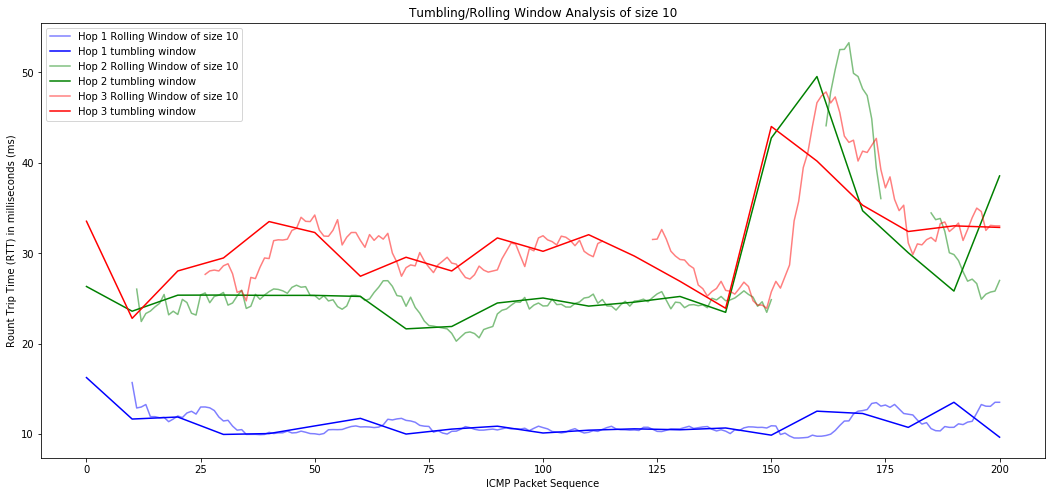

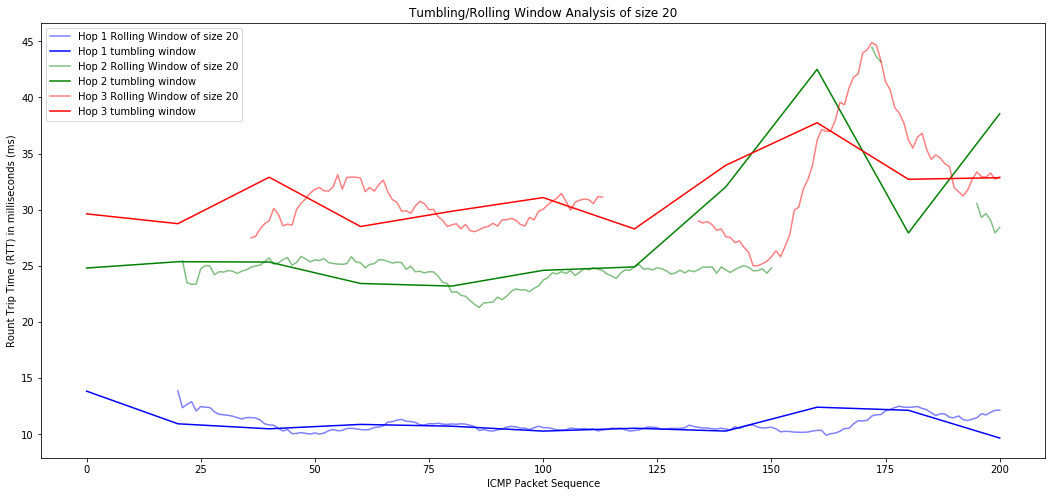

In [113]:
for window_size in [5, 10, 20]:  
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for hop in hop_nodes2.keys():
        plt.plot(hop_nodes2[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
        plt.plot(hop_nodes2[hop].groupby(hop_nodes2[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

    plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
    plt.legend()

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

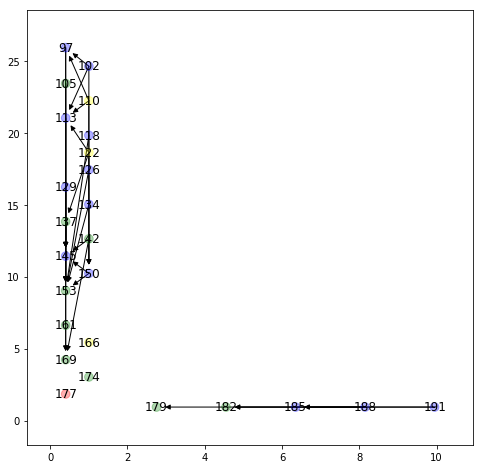

In [115]:
G1b = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G1, pos=nx.get_node_attributes(G1,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G1,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G1, pos=nx.get_node_attributes(G1,'loc'), labels=nx.get_node_attributes(G1,'id'))
nx.draw_networkx_edges(G1, pos=nx.get_node_attributes(G1,'loc'))
plt.show()

## Additional 2 node disconnections
Parse the 3rd trace file with 200 packets over a network with 2 additional nodes are disconnected. Now a total of 3 nodes are offline (node 153,169,182).

In [116]:
hop_nodes3 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')
std_values3, outliers3 = trace_analysis.separate_outliers(hop_nodes3)
tubling_packet_loss3 = trace_statistics.tumbling_packet_loss_per_hop(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182', window_size=10)

../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


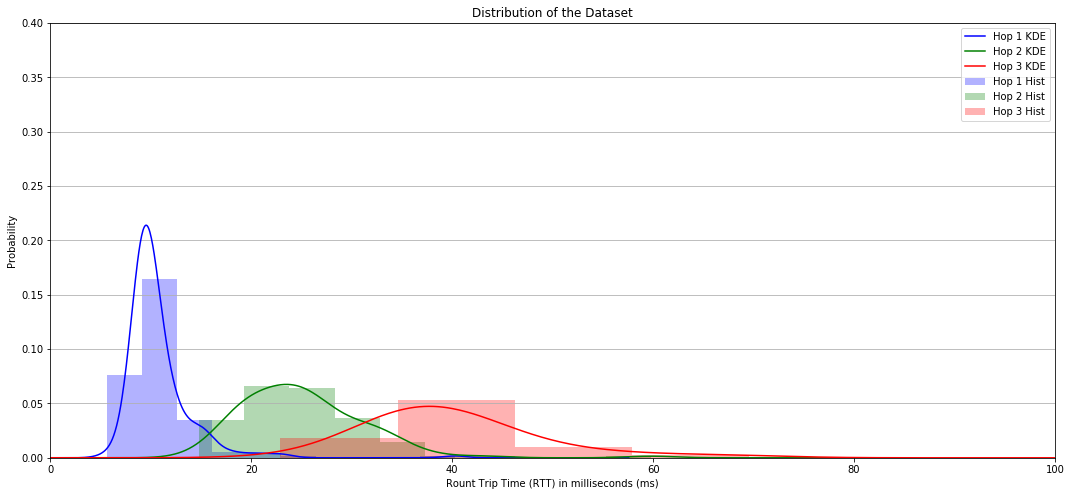

In [117]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    hop_nodes3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

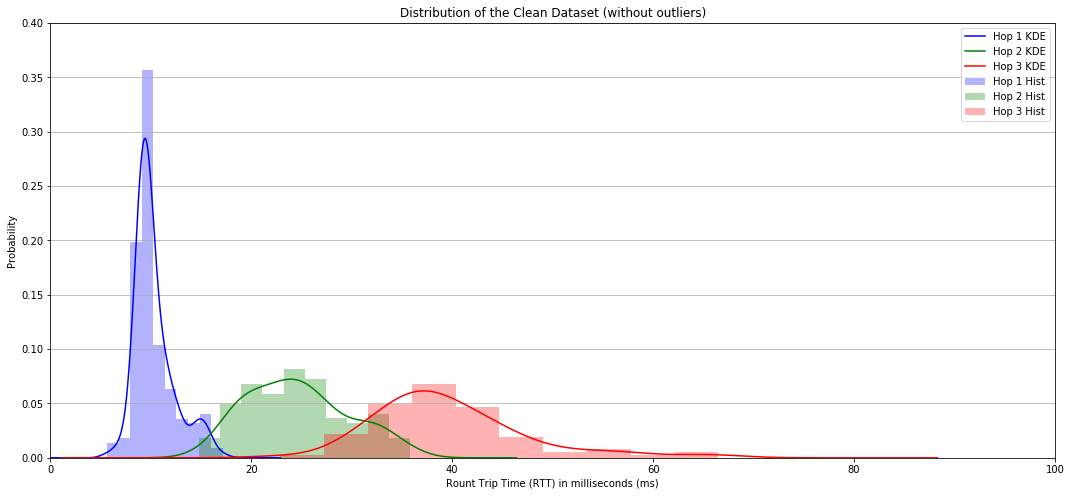

In [118]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values3.keys():
    std_values3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset (without outliers)')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

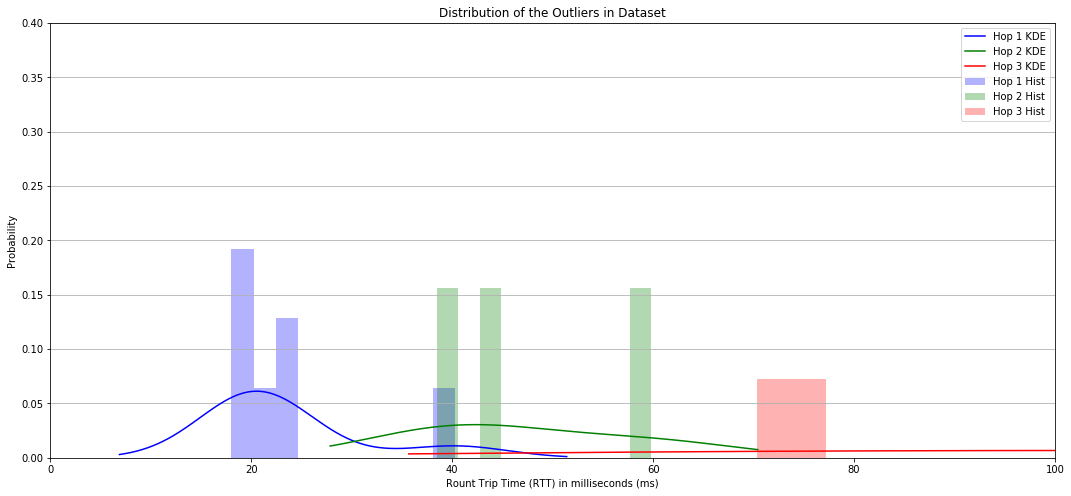

In [119]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers3.keys():
    outliers3[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers3[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


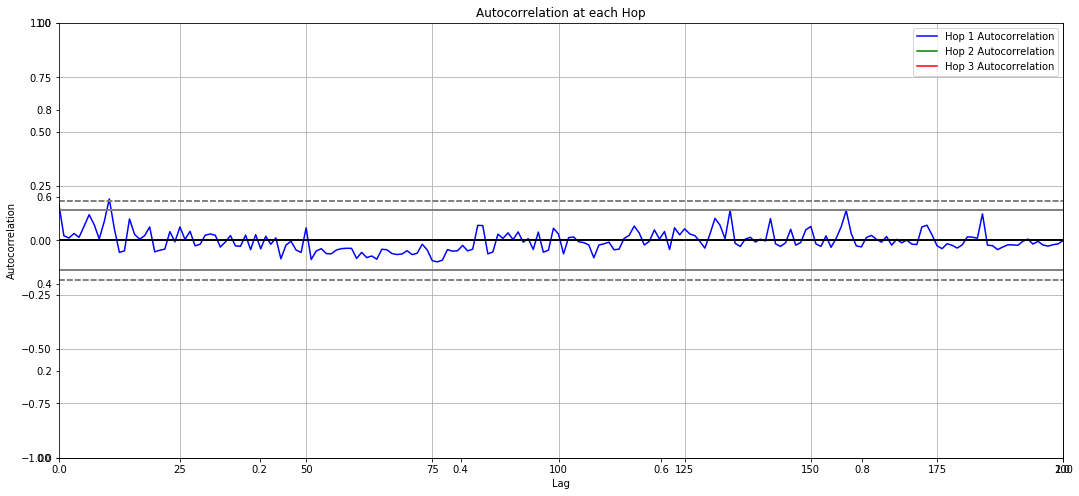

In [120]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes3.keys():
    autocorrelation_plot(hop_nodes3[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

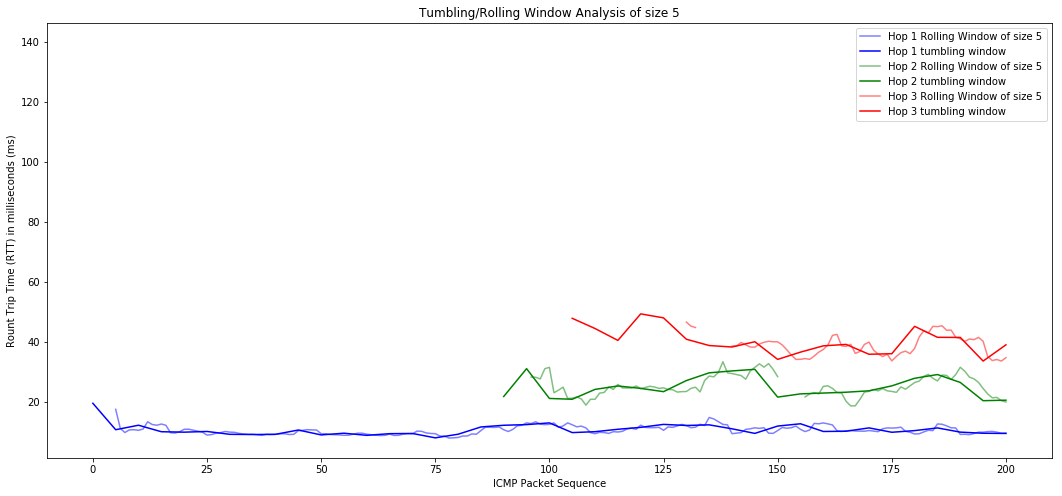

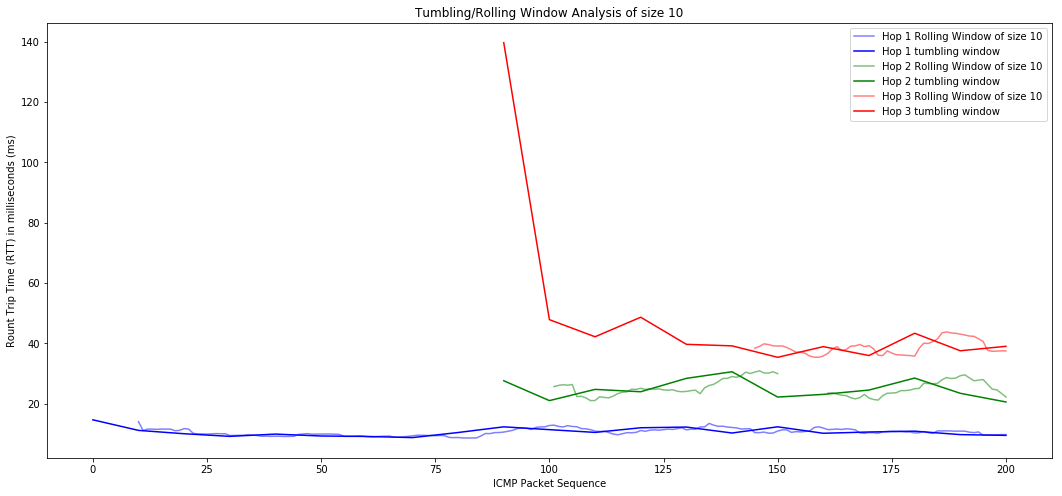

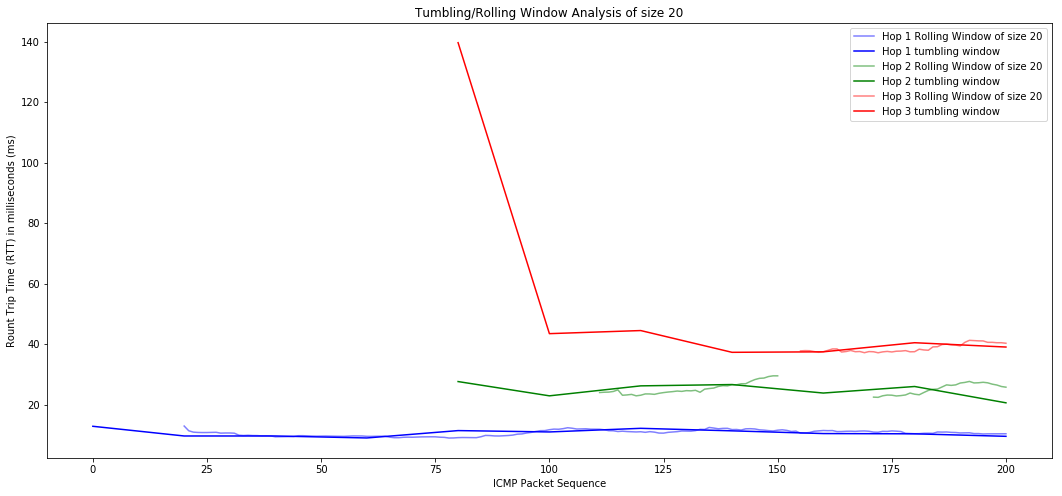

In [121]:
for window_size in [5, 10, 20]:  
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for hop in hop_nodes3.keys():
        plt.plot(hop_nodes3[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
        plt.plot(hop_nodes3[hop].groupby(hop_nodes3[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

    plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
    plt.legend()

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

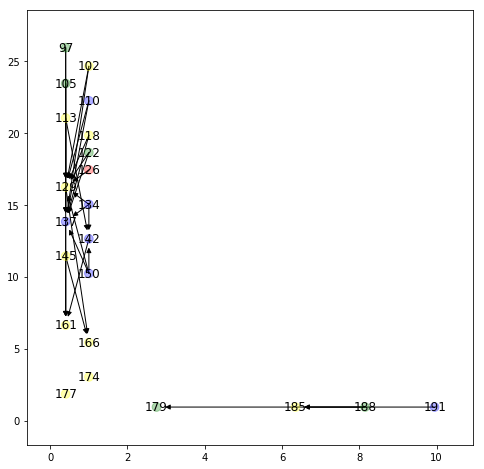

In [123]:
G3 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-1b169b153b182')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G3, pos=nx.get_node_attributes(G3,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G3,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G3, pos=nx.get_node_attributes(G3,'loc'), labels=nx.get_node_attributes(G3,'id'))
nx.draw_networkx_edges(G3, pos=nx.get_node_attributes(G3,'loc'))
plt.show()

## Nodes are re-activated
Parse the 4th trace file with 200 packets when 3 nodes (153,169,182) are re-activated.

In [124]:
hop_nodes4 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-2')
std_values4, outliers4 = trace_analysis.separate_outliers(hop_nodes4)
tubling_packet_loss4 = trace_statistics.tumbling_packet_loss_per_hop(os.getcwd() + '/traces/', '2019-01JAN-30-2', window_size=10)

../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


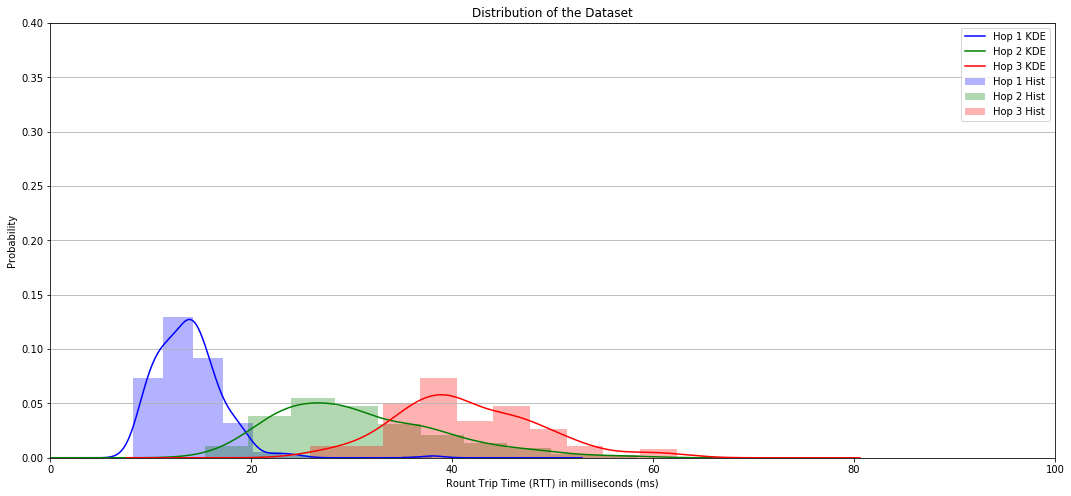

In [125]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes4.keys():
    hop_nodes4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

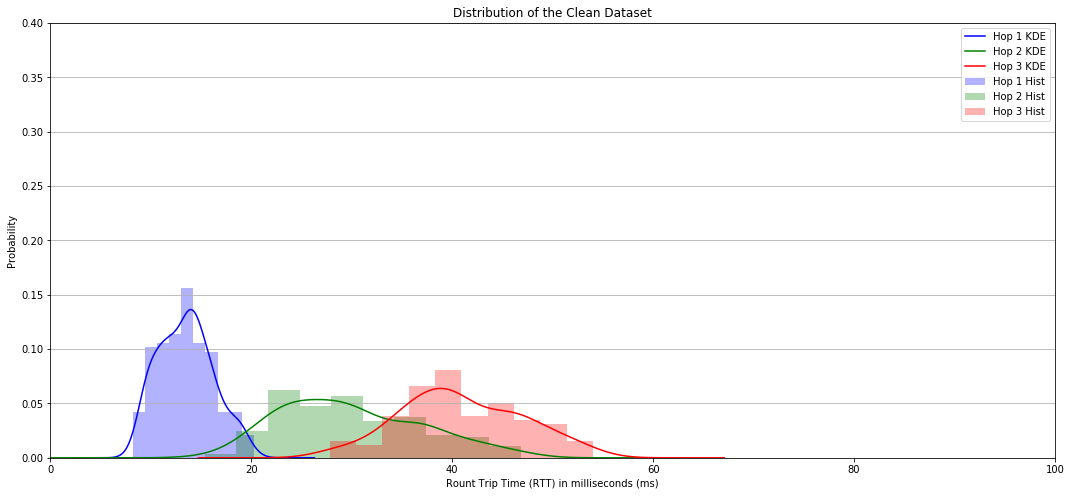

In [126]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values4.keys():
    std_values4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

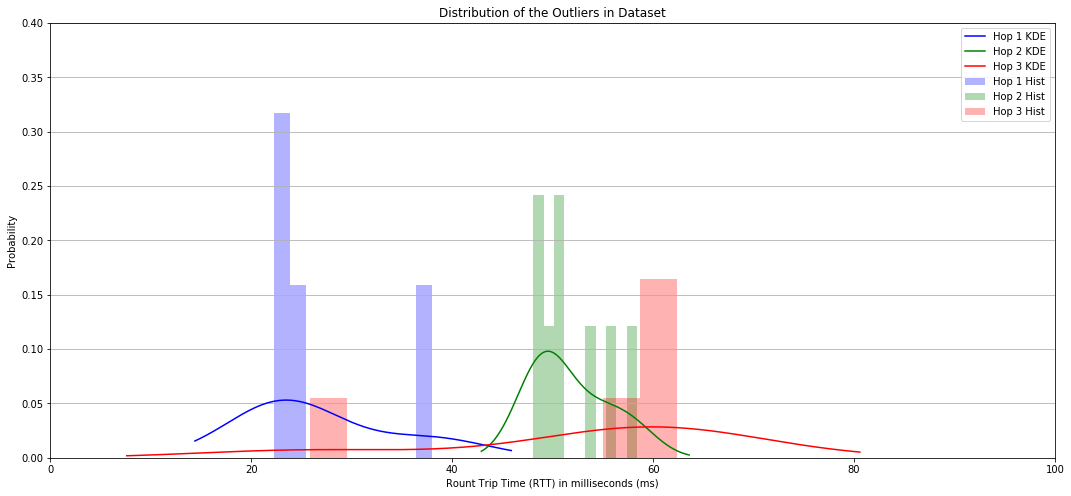

In [127]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers4.keys():
    outliers4[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers4[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


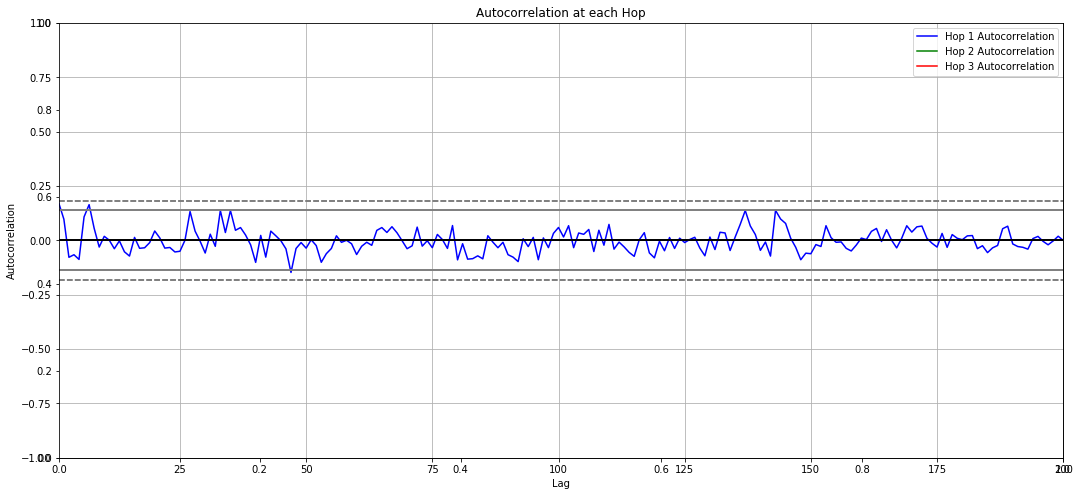

In [128]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes4.keys():
    autocorrelation_plot(hop_nodes4[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

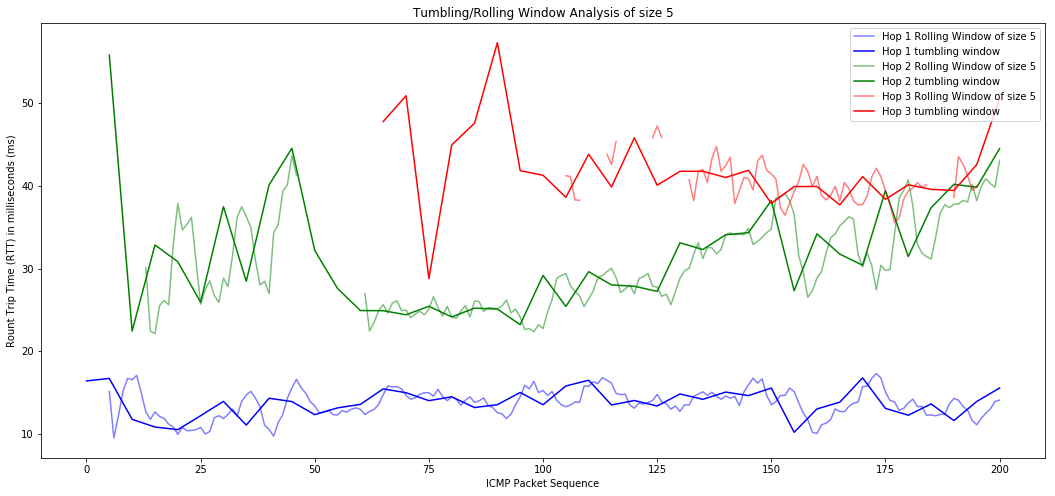

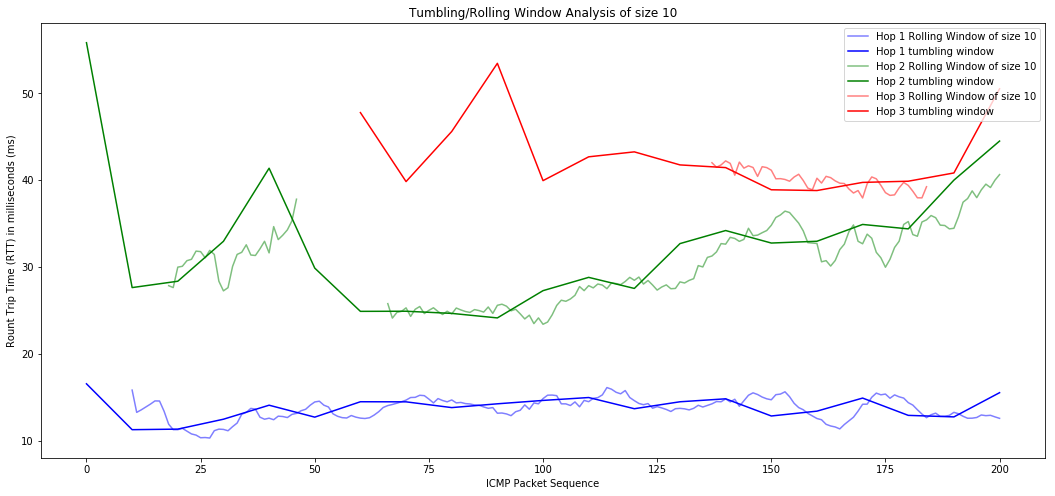

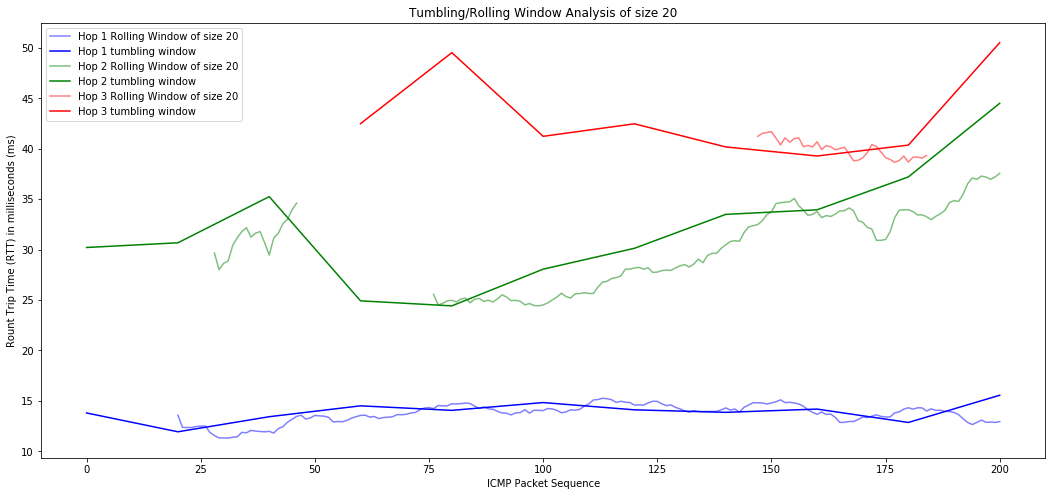

In [129]:
for window_size in [5, 10, 20]:  
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for hop in hop_nodes4.keys():
        plt.plot(hop_nodes4[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
        plt.plot(hop_nodes4[hop].groupby(hop_nodes4[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

    plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
    plt.legend()

Visualize network topology

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

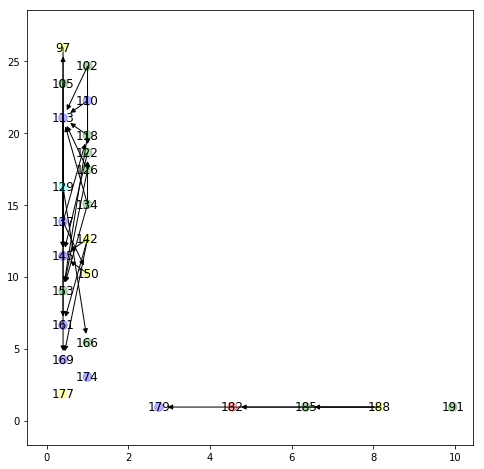

In [131]:
G4 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-2')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G4, pos=nx.get_node_attributes(G4,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G4,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G4, pos=nx.get_node_attributes(G4,'loc'), labels=nx.get_node_attributes(G4,'id'))
nx.draw_networkx_edges(G4, pos=nx.get_node_attributes(G4,'loc'))
plt.show()

## 5 Nodes are de-activated
Parse the 5th trace file with 200 packets when 5 nodes (113,122,145,166,185) are de-activated.

In [132]:
hop_nodes5 = trace_analysis.process_iotlab_aggregated(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185')
std_values5, outliers5 = trace_analysis.separate_outliers(hop_nodes5)
tubling_packet_loss5 = trace_statistics.tumbling_packet_loss_per_hop(os.getcwd() + '/traces/', '2019-01JAN-30-3b113b122b145b166b185', window_size=10)

../trace_analysis.py:29: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rank['rank'] = rank['rank'].convert_objects(convert_numeric=True)


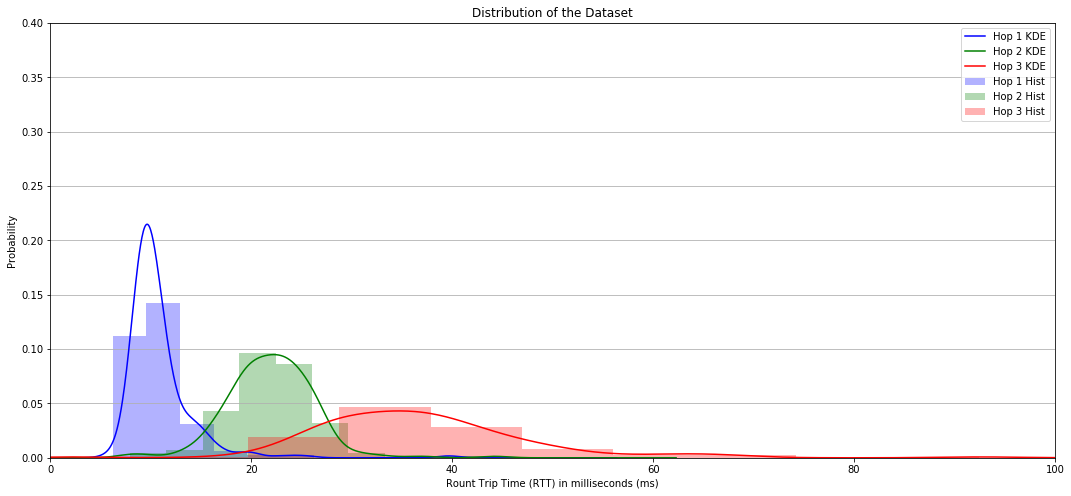

In [133]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes5.keys():
    hop_nodes5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    hop_nodes5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

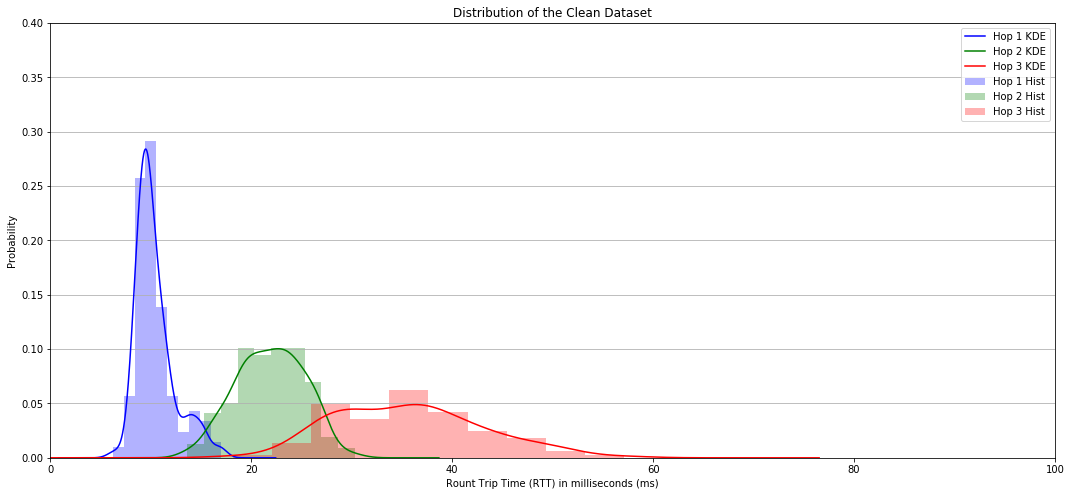

In [134]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in std_values5.keys():
    std_values5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    std_values5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Clean Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

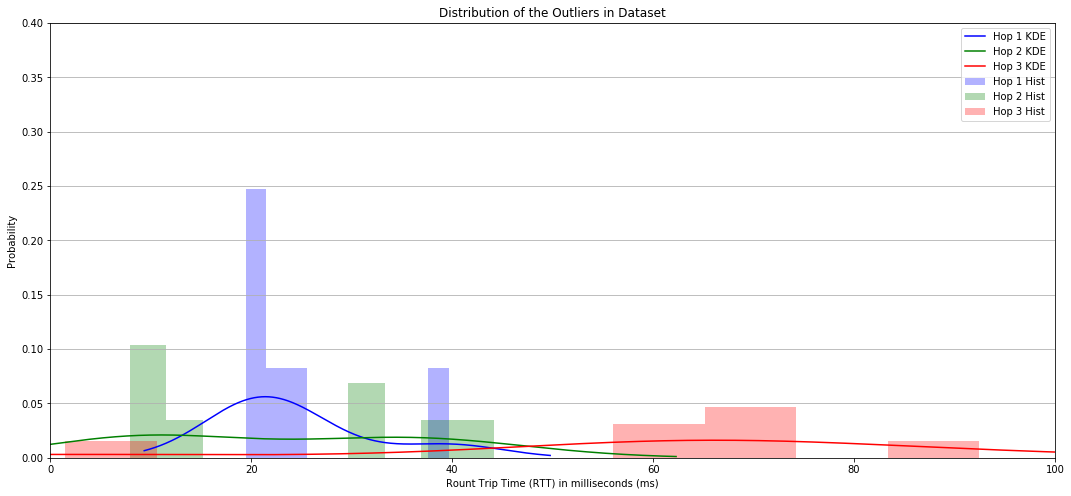

In [135]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in outliers5.keys():
    outliers5[hop].plot.kde(ax=ax, color=color[hop], label='Hop ' + str(hop) + ' KDE')
    outliers5[hop].plot.hist(density=True, color=color[hop], alpha=0.3, ax=ax, label='Hop ' + str(hop) + ' Hist')

ax.set_ylabel('Probability')
ax.set_xlabel('Rount Trip Time (RTT) in milliseconds (ms)')
ax.grid(axis='y')
ax.set_title('Distribution of the Outliers in Dataset')
ax.set_xlim([0, 100])
ax.set_ylim([0,0.4])
ax.legend()
plt.show()

Plot the autocorrelation at each hop

/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)
No handles with labels found to put in legend.


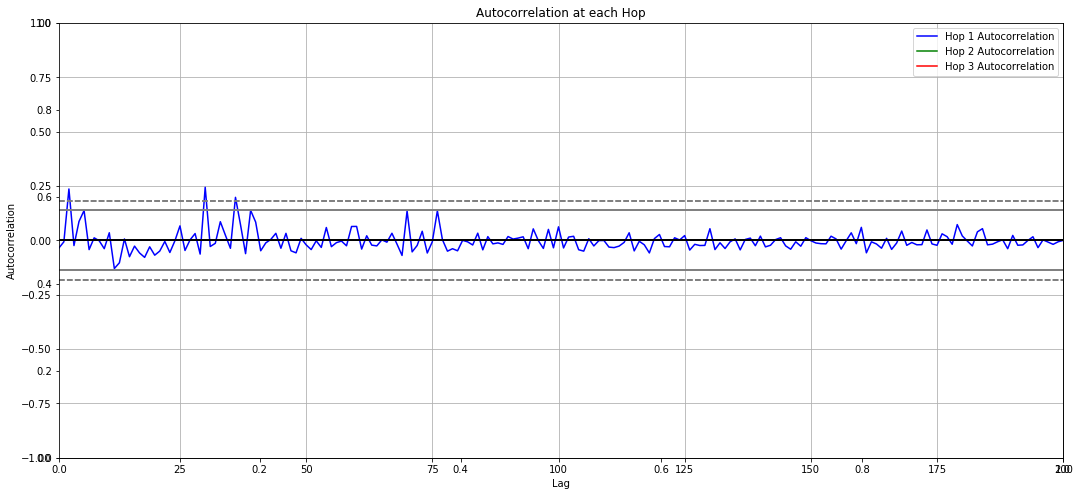

In [136]:
fig, ax = plt.subplots(figsize=(18, 8))
for hop in hop_nodes5.keys():
    autocorrelation_plot(hop_nodes5[hop], color=color[hop], label='Hop ' + str(hop) + ' Autocorrelation')


#ax.set_xlabel('RTT')
ax.set_title('Autocorrelation at each Hop')
ax.legend()
plt.show()


Produce a visualization of a tumbling window

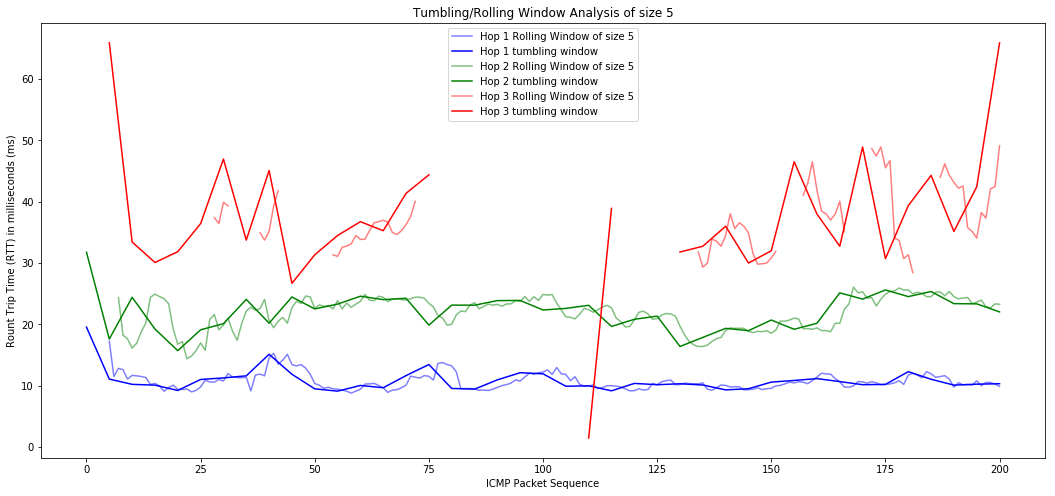

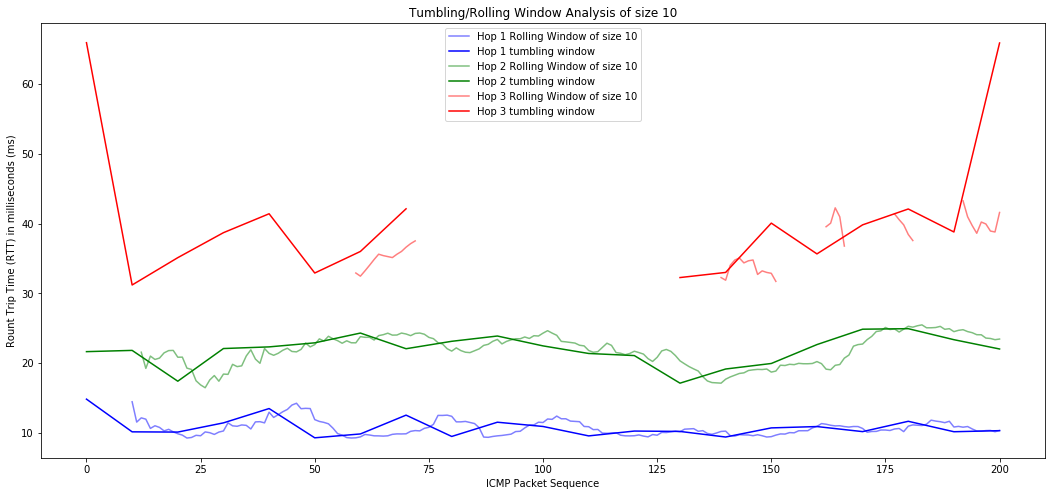

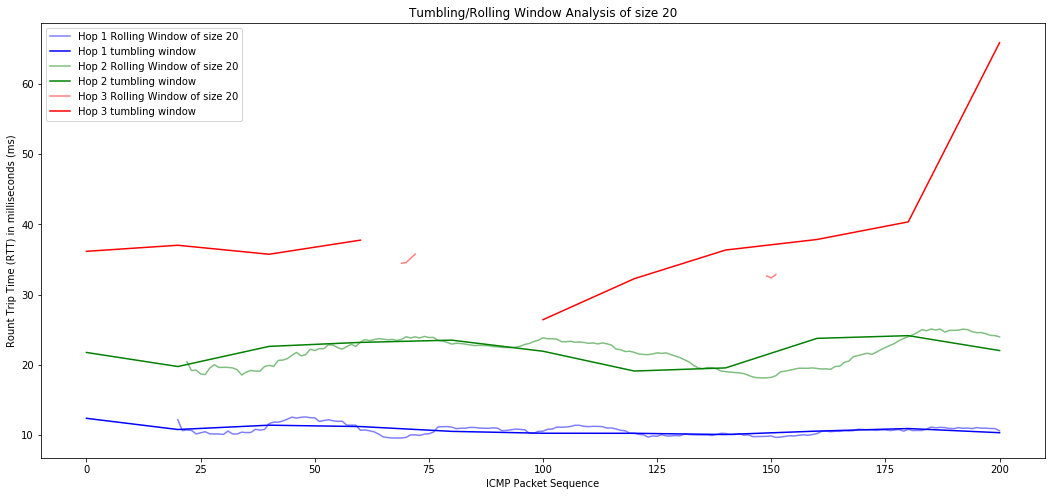

In [137]:
for window_size in [5, 10, 20]:  
    fig, ax = plt.subplots(figsize=(18, 8))
    plt.ylabel('Rount Trip Time (RTT) in milliseconds (ms)')
    plt.xlabel('ICMP Packet Sequence')

    for hop in hop_nodes5.keys():
        plt.plot(hop_nodes5[hop].rolling(window_size).mean(), color=color[hop], alpha=0.5, label='Hop ' + str(hop) + ' Rolling Window of size ' + str(window_size))
        plt.plot(hop_nodes5[hop].groupby(hop_nodes5[hop].index // window_size * window_size).mean(), color=color[hop], label='Hop ' + str(hop) + ' tumbling window')

    plt.title('Tumbling/Rolling Window Analysis of size ' + str(window_size))
    plt.legend()

Packet loss in a tumbling window

../trace_analysis.py:159: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['node_id'] = addr['node_id'].convert_objects(convert_numeric=True)
../trace_analysis.py:175: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  addr['rank'] = rank['rank'].convert_objects(convert_numeric=True)
../trace_analysis.py:190: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  rpl['node_id'] = rpl['node_id'].convert_objects(convert_numeric=True)


<Figure size 432x288 with 0 Axes>

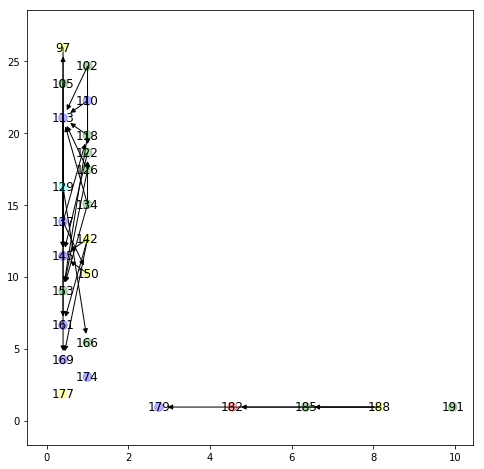

In [139]:
G4 = trace_analysis.produce_iotlab_topology(os.getcwd() + '/traces/', '2019-01JAN-30-2')

plt.clf()
fig = plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G4, pos=nx.get_node_attributes(G4,'loc'), node_shape='.', node_color=list(nx.get_node_attributes(G4,'color').values()), alpha=0.3)
nx.draw_networkx_labels(G4, pos=nx.get_node_attributes(G4,'loc'), labels=nx.get_node_attributes(G4,'id'))
nx.draw_networkx_edges(G4, pos=nx.get_node_attributes(G4,'loc'))
plt.show()